# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">رویدادهای ماوس در OpenCV</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در ابتدا تمام event یا رویدادهای موجود را چاپ میکنیم:</div>

In [1]:
import cv2
events = [i for i in dir(cv2) if 'EVENT' in i]
print( events )

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک برنامه ی خیلی ساده که با کلیک دایره رسم میکند:</div>

In [2]:
import numpy as np
import cv2

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),20,(150,0,200),-1)
        
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()



<div style="direction:rtl;text-align:right;font-family:Tahoma">
برنامه ای نظیر قلم در paint</div>

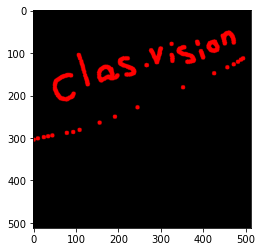

In [3]:
import matplotlib.pyplot as plt

import numpy as np
import cv2 

drawing = False # true if mouse is pressed

# mouse callback function
def brush(event,x,y,flags,param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
            
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',brush)

while True:
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعویض رنگ قلم با رویدادهای کیبورد(r و g و b)</div>

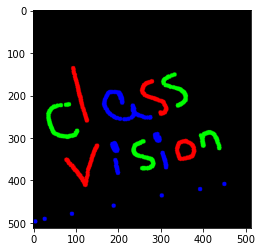

In [4]:
import matplotlib.pyplot as plt

import numpy as np
import cv2 

drawing = False # true if mouse is pressed
color = (0,255,0)
# mouse callback function
def brush(event,x,y,flags,param):
    global drawing, color
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),5,color,-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
            
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',brush)

while True:
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('b'):
        color = (255,0,0)
    elif k==ord('g'):
        color = (0,255,0)
    elif k==ord('r'):
        color = (0,0,255)
    elif k == 27:
        break
cv2.destroyAllWindows()

plt.imshow(img[...,::-1])

<div style="direction:rtl;text-align:right;font-family:Tahoma">
رفع مشکل فاصله بین نقاط</div>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


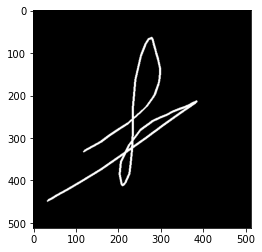

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 

# Making The Blank Image
img = np.zeros((512,512,3))
drawing = False
ix = 0
iy = 0
# Adding Function Attached To Mouse Callback
def draw(event,x,y,flags,params):
    global ix,iy,drawing
    # Left Mouse Button Down Pressed
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix = x
        iy = y
    if event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            #For Drawing Line
            cv2.line(img,pt1=(ix,iy),pt2=(x,y),color=(255,255,255),thickness=3)
            ix = x
            iy = y
    if event==cv2.EVENT_LBUTTONUP:
        drawing = False



# Making Window For The Image
cv2.namedWindow("Window")

# Adding Mouse CallBack Event
cv2.setMouseCallback("Window",draw)

# Starting The Loop So Image Can Be Shown
while True:

    cv2.imshow("Window",img)

    if cv2.waitKey(1) & 0xFF ==27:
        break

cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

<div style="direction:rtl;text-align:right;font-family:Tahoma">
ترسیم مستطیل تو پر با ماوس</div>

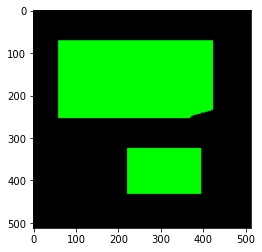

In [53]:
import numpy as np
import cv2 

drawing = False # true if mouse is pressed
start_point= (0,0)

# mouse callback function
def draw_rectangle(event,x,y,flags,param):
    global start_point, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img,start_point,(x,y),(0,255,0),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_rectangle)

while True:
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

<div style="direction:rtl;text-align:right;font-family:Tahoma">
ترسیم مستطیل تو خالی با ماوس + قابلیت reset صفحه و چاپ مختصات های رسم شده</div>

[[(88, 213), (328, 397)], [(328, 148), (491, 411)], [(543, 424), (323, 259)]]


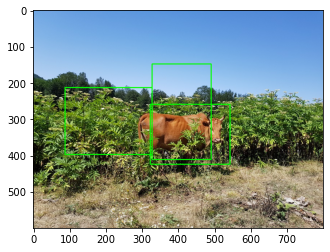

In [55]:
# import the necessary packages
import cv2

# now let's initialize the list of reference point
start_point = (0,0)
points = []
drawing = False # true if mouse is pressed

def draw_empty_rectangle(event, x, y, flags, param):
    # grab references to the global variables
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)

    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        points.append([start_point , (x, y)])

        # draw a rectangle around the region of interest
        cv2.rectangle(image, start_point, (x, y), (0, 255, 0), 2)
        cv2.imshow("image", image)

# load the image, clone it, and setup the mouse callback function
image = cv2.imread('images/input.jpg')
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", draw_empty_rectangle)


# keep looping until the 'q' key is pressed
while True:
    # display the image and wait for a keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()
        points = []

    # if the 'c' key is pressed, break from the loop
    elif key == 27:
        break

# close all open windows
cv2.destroyAllWindows() 

plt.imshow(image[...,::-1])
print(points)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
حل مشکل عدم نمایش مستطیل تا برداشتن کلیک چپ
</div>

[[(269, 246), (549, 409)]]


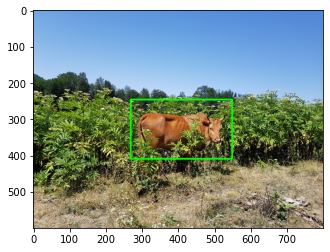

In [50]:
# import the necessary packages
import cv2

# now let's initialize the list of reference point
start_point = (0,0)
points = []
drawing= False

def annotate_image(event, x, y, flags, param):
    # grab references to the global variables
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True 
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp_image = image.copy()
            cv2.rectangle(temp_image, start_point, (x, y), (120,255,0), 2)
            cv2.imshow("image", temp_image)
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        points.append([start_point , (x, y)])

        # draw a rectangle around the region of interest
        cv2.rectangle(image, start_point, (x, y), (0, 255, 0), 3)
        cv2.imshow("image", image)
        drawing = False

        
# load the image, clone it, and setup the mouse callback function
image = cv2.imread('images/input.jpg')
clone = image.copy()
temp_image = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", annotate_image)

while True:
    # display the image and wait for a keypress
    if drawing == False:
        cv2.imshow("image", image)
    key = cv2.waitKey(5) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()
        points = []

    # if the 'c' key is pressed, break from the loop
    elif key == 27:
        break

# close all open windows
cv2.destroyAllWindows() 

plt.imshow(image[...,::-1])
print(points)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
افزودن قابلیت undo</div>

[[(268, 255), (557, 428)]]


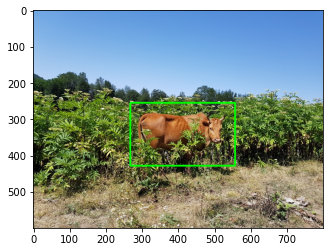

In [51]:
# import the necessary packages
import cv2

# now let's initialize the list of reference point
start_point = (0,0)
points = []
drawing= False

def annotate_image_with_undo(event, x, y, flags, param):
    # grab references to the global variables
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True 
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp_image = image.copy()
            cv2.rectangle(temp_image, start_point, (x, y), (120,255,0), 2)
            cv2.imshow("image", temp_image)
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        points.append([start_point , (x, y)])

        # draw a rectangle around the region of interest
        cv2.rectangle(image, start_point, (x, y), (0, 255, 0), 3)
        cv2.imshow("image", image)
        drawing = False

        
# load the image, clone it, and setup the mouse callback function
image = cv2.imread('images/input.jpg')
clone = image.copy()
temp_image = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", annotate_image_with_undo)

while True:
    # display the image and wait for a keypress
    if drawing == False:
        cv2.imshow("image", image)
    key = cv2.waitKey(5) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()
        points = []
    
    elif key == ord("z"): # with ctrl+z functionality
        image = clone.copy()
        points.pop()
        for p in points:
            cv2.rectangle(image, p[0], p[1], (0, 255, 0), 3)
    # if the 'c' key is pressed, break from the loop
    elif key == 27:
        break

# close all open windows
cv2.destroyAllWindows() 

plt.imshow(image[...,::-1])
print(points)

Related tutorial on OpenCV.org: https://docs.opencv.org/4.6.0/db/d5b/tutorial_py_mouse_handling.html